In [1]:
import IPython.core.display
import matplotlib
import itertools
def apply_styles():
    matplotlib.rcParams['font.size'] = 12
    matplotlib.rcParams['figure.figsize'] = (18, 6)
    matplotlib.rcParams['lines.linewidth'] = 1

apply_styles()

import pandas as pd
import numpy as np
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from statsmodels.tsa.stattools import adfuller

# Question 3 a
Load the data in Python

# Load the data into Pandas DataFrame

In [2]:

new_names = ['YearMonth', 'Red', 'Sparkling', 'Sweetwhite']
df = pd.read_csv("AusWineSales.csv", header=None, skiprows=1, names=new_names)
df.head()

,YearMonth,Red,Sparkling,Sweetwhite
0,1980-01,464,1686,85
1,1980-02,675,1591,89
2,1980-03,703,2304,109
3,1980-04,887,1712,95
4,1980-05,1139,1471,91


In [3]:
df.tail()

,YearMonth,Red,Sparkling,Sweetwhite
182,1995-03,2459,1897,188
183,1995-04,2618,1862,195
184,1995-05,2585,1670,189
185,1995-06,3310,1688,220
186,1995-07,3923,2031,274


In [4]:
dates = pd.date_range(start='1980-01-01', freq='MS', periods=len(df))

In [5]:
df['Month'] = dates.month
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df['Year'] = dates.year

In [6]:
df = df[['Month', 'Year', 'Red', 'Sparkling', 'Sweetwhite']]

In [7]:
df.set_index(dates, inplace=True)

In [8]:
df.head(5)

,Month,Year,Red,Sparkling,Sweetwhite
1980-01-01,Jan,1980,464,1686,85
1980-02-01,Feb,1980,675,1591,89
1980-03-01,Mar,1980,703,2304,109
1980-04-01,Apr,1980,887,1712,95
1980-05-01,May,1980,1139,1471,91


# Question 3 b
Smooth the series of sweet white sales with an appropriate moving average. 
Plot both the original and moving average on the same graph, preferably using different colors.

In [9]:
df_sweetwhite = df[['Month', 'Year', 'Sweetwhite']]
sweetwhite_ts = df_sweetwhite['Sweetwhite']

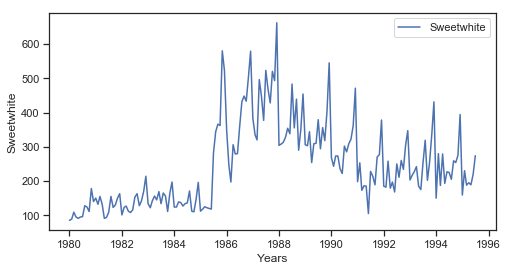

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(sweetwhite_ts)
plt.xlabel('Years')
plt.ylabel('Sweetwhite')
plt.legend(loc='best')

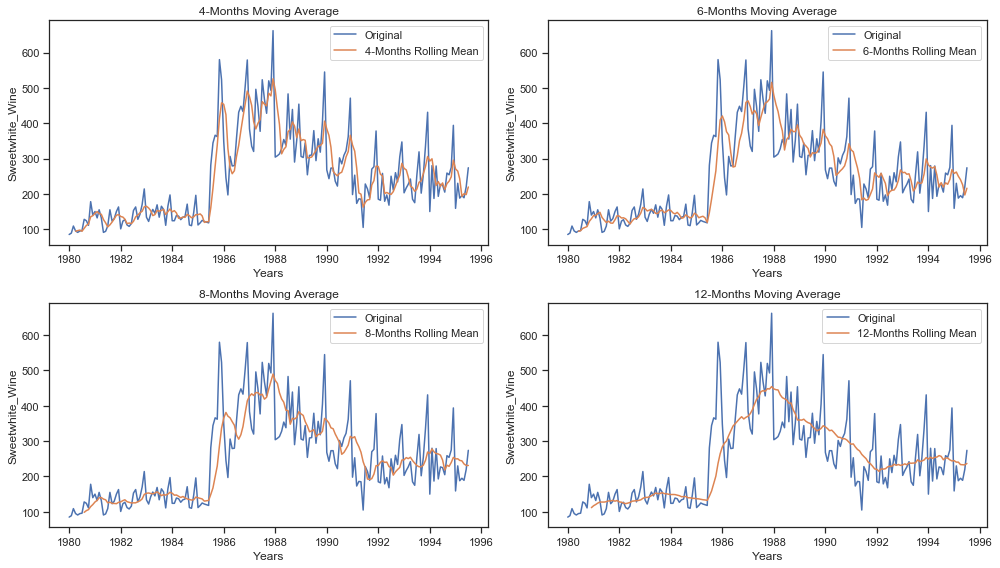

In [11]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sweetwhite_ts.index, sweetwhite_ts, label='Original')
axes[0][0].plot(sweetwhite_ts.index, sweetwhite_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Sweetwhite_Wine")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(sweetwhite_ts.index, sweetwhite_ts, label='Original')
axes[0][1].plot(sweetwhite_ts.index, sweetwhite_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Sweetwhite_Wine")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(sweetwhite_ts.index, sweetwhite_ts, label='Original')
axes[1][0].plot(sweetwhite_ts.index, sweetwhite_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Sweetwhite_Wine")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(sweetwhite_ts.index, sweetwhite_ts, label='Original')
axes[1][1].plot(sweetwhite_ts.index, sweetwhite_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Sweetwhite_Wine")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()


In [12]:
#Determing rolling statistics
rolmean = sweetwhite_ts.rolling(window=12).mean()
rolstd = sweetwhite_ts.rolling(window=12).std()

Text(0.5,1,'Rolling Mean & Standard Deviation')

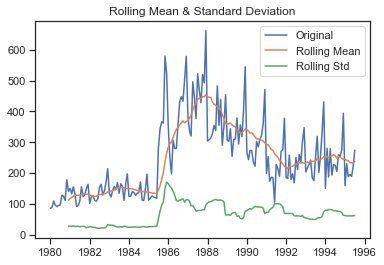

In [13]:
#Plot rolling statistics:
orig = plt.plot(sweetwhite_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

# Dickey-Fuller Test - Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [14]:
dftest = adfuller(sweetwhite_ts)
dftest

(-1.71739742164999,
 0.4221718269695356,
 13,
 173,
 {'1%': -3.4687256239864017,
  '5%': -2.8783961376954363,
  '10%': -2.57575634100705},
 1880.6778070857513)

# Seasonality – Time Series Decomposition

In [15]:
monthly_sales_data = pd.pivot_table(df_sweetwhite, values = "Sweetwhite", columns = "Year", index = "Month")
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Apr,95.0,132.0,112.0,156.0,137.0,122.0,306.0,496.0,328.0,254.0,273.0,186.0,179.0,242.0,279.0,195.0
Aug,128.0,155.0,163.0,165.0,171.0,344.0,431.0,468.0,355.0,294.0,285.0,214.0,211.0,319.0,205.0,NaN
Dec,140.0,163.0,214.0,197.0,196.0,523.0,579.0,662.0,454.0,545.0,471.0,378.0,347.0,431.0,394.0,NaN
Feb,89.0,132.0,123.0,122.0,124.0,118.0,246.0,335.0,308.0,303.0,243.0,253.0,182.0,217.0,280.0,230.0
Jan,85.0,150.0,101.0,134.0,124.0,112.0,348.0,384.0,304.0,306.0,268.0,198.0,185.0,203.0,150.0,159.0
Jul,96.0,109.0,153.0,134.0,136.0,281.0,358.0,523.0,483.0,379.0,302.0,228.0,250.0,252.0,225.0,274.0
Jun,95.0,94.0,116.0,169.0,134.0,118.0,280.0,377.0,338.0,310.0,222.0,105.0,168.0,175.0,227.0,220.0
Mar,109.0,155.0,127.0,142.0,139.0,125.0,197.0,320.0,313.0,344.0,273.0,173.0,258.0,227.0,187.0,188.0
May,91.0,91.0,108.0,145.0,127.0,120.0,279.0,448.0,354.0,309.0,236.0,185.0,197.0,185.0,193.0,189.0


In [16]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Jan,85.0,150.0,101.0,134.0,124.0,112.0,348.0,384.0,304.0,306.0,268.0,198.0,185.0,203.0,150.0,159.0
Feb,89.0,132.0,123.0,122.0,124.0,118.0,246.0,335.0,308.0,303.0,243.0,253.0,182.0,217.0,280.0,230.0
Mar,109.0,155.0,127.0,142.0,139.0,125.0,197.0,320.0,313.0,344.0,273.0,173.0,258.0,227.0,187.0,188.0
Apr,95.0,132.0,112.0,156.0,137.0,122.0,306.0,496.0,328.0,254.0,273.0,186.0,179.0,242.0,279.0,195.0
May,91.0,91.0,108.0,145.0,127.0,120.0,279.0,448.0,354.0,309.0,236.0,185.0,197.0,185.0,193.0,189.0
Jun,95.0,94.0,116.0,169.0,134.0,118.0,280.0,377.0,338.0,310.0,222.0,105.0,168.0,175.0,227.0,220.0
Jul,96.0,109.0,153.0,134.0,136.0,281.0,358.0,523.0,483.0,379.0,302.0,228.0,250.0,252.0,225.0,274.0
Aug,128.0,155.0,163.0,165.0,171.0,344.0,431.0,468.0,355.0,294.0,285.0,214.0,211.0,319.0,205.0,NaN
Sep,124.0,123.0,128.0,156.0,112.0,366.0,448.0,428.0,439.0,356.0,309.0,189.0,260.0,202.0,259.0,NaN


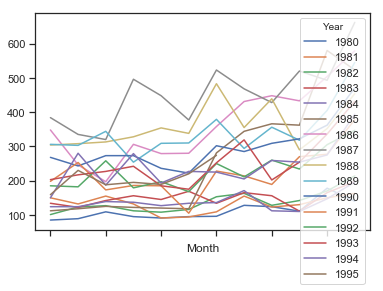

In [17]:
monthly_sales_data.plot()

In [18]:
yearly_sales_data = pd.pivot_table(df_sweetwhite, values = "Sweetwhite", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,85.0,89.0,109.0,95.0,91.0,95.0,96.0,128.0,124.0,111.0,178.0,140.0
1981,150.0,132.0,155.0,132.0,91.0,94.0,109.0,155.0,123.0,130.0,150.0,163.0
1982,101.0,123.0,127.0,112.0,108.0,116.0,153.0,163.0,128.0,142.0,170.0,214.0
1983,134.0,122.0,142.0,156.0,145.0,169.0,134.0,165.0,156.0,111.0,165.0,197.0
1984,124.0,124.0,139.0,137.0,127.0,134.0,136.0,171.0,112.0,110.0,147.0,196.0
1985,112.0,118.0,125.0,122.0,120.0,118.0,281.0,344.0,366.0,362.0,580.0,523.0
1986,348.0,246.0,197.0,306.0,279.0,280.0,358.0,431.0,448.0,433.0,504.0,579.0
1987,384.0,335.0,320.0,496.0,448.0,377.0,523.0,468.0,428.0,520.0,493.0,662.0
1988,304.0,308.0,313.0,328.0,354.0,338.0,483.0,355.0,439.0,290.0,352.0,454.0


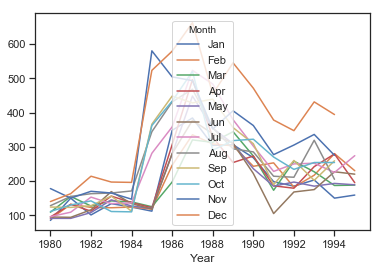

In [19]:
yearly_sales_data.plot()

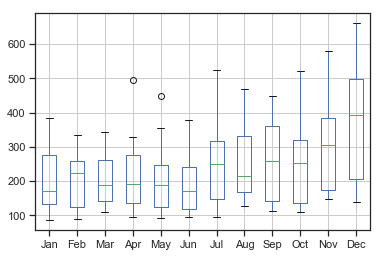

In [20]:
yearly_sales_data.boxplot()

# Answer :
Sweetwhite wine series is having the behaviour of 'multiplicative' nature

# Question 3 c
Do month plot on both sparkling and red wine series.

Which is the main difference noted between the two series?

In [21]:
df_red = df[['Month', 'Year', 'Red']]
red_ts = df_red['Red']

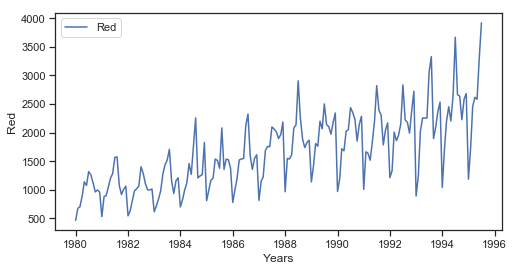

In [22]:
plt.figure(figsize=(8, 4))
plt.plot(red_ts)
plt.xlabel('Years')
plt.ylabel('Red')
plt.legend(loc='best')

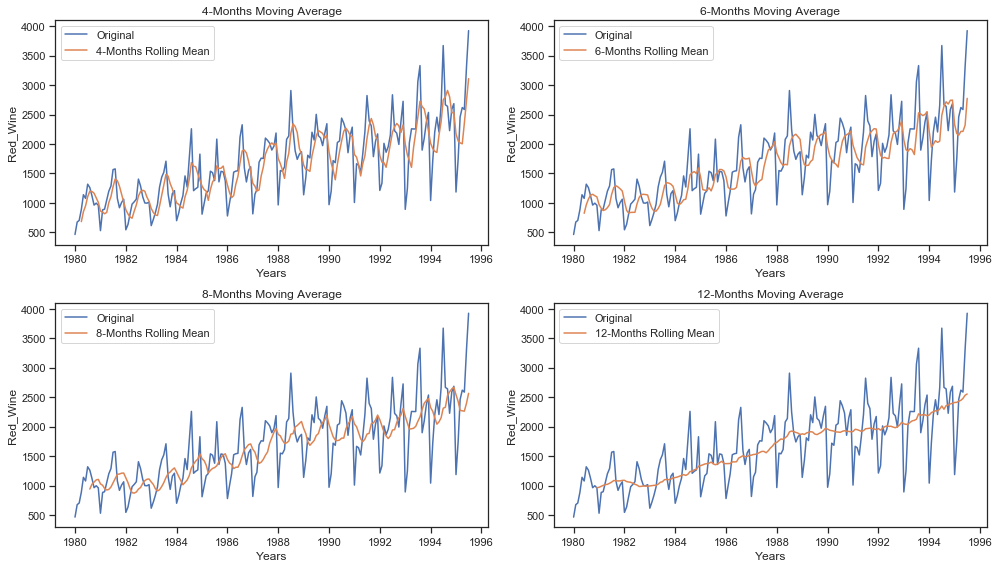

In [23]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(red_ts.index, red_ts, label='Original')
axes[0][0].plot(red_ts.index, red_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Red_Wine")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(red_ts.index, red_ts, label='Original')
axes[0][1].plot(red_ts.index, red_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Red_Wine")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(red_ts.index, red_ts, label='Original')
axes[1][0].plot(red_ts.index, red_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Red_Wine")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(red_ts.index, red_ts, label='Original')
axes[1][1].plot(red_ts.index, red_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Red_Wine")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

In [24]:
#Determing rolling statistics
rolmean = red_ts.rolling(window=12).mean()
rolstd = red_ts.rolling(window=12).std()

Text(0.5,1,'Rolling Mean & Standard Deviation')

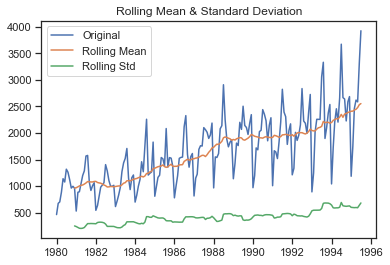

In [25]:
#Plot rolling statistics:
orig = plt.plot(red_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

# Dickey-Fuller Test - Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [26]:
dftest = adfuller(red_ts)
dftest

(0.9325860421378593,
 0.9935011829238276,
 11,
 175,
 {'1%': -3.4682803641749267,
  '5%': -2.8782017240816327,
  '10%': -2.5756525795918366},
 2377.647632146392)

# Seasonality – Time Series Decomposition

In [27]:
monthly_sales_data = pd.pivot_table(df_red, values = "Red", columns = "Year", index = "Month")
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Apr,887.0,1045.0,980.0,977.0,1124.0,1205.0,1522.0,1691.0,1612.0,1763.0,1683.0,1518.0,1860.0,2257.0,2455.0,2618.0
Aug,1260.0,1577.0,1286.0,1708.0,2258.0,2083.0,2326.0,2062.0,2249.0,2141.0,2353.0,2393.0,2224.0,3330.0,2665.0,NaN
Dec,960.0,1063.0,1015.0,1209.0,1828.0,1376.0,1613.0,2186.0,1868.0,2344.0,2286.0,2171.0,2724.0,2535.0,2684.0,NaN
Feb,675.0,883.0,635.0,722.0,830.0,997.0,1005.0,1150.0,1549.0,1430.0,1199.0,1665.0,1335.0,1247.0,1728.0,1749.0
Jan,464.0,530.0,544.0,615.0,699.0,809.0,779.0,814.0,966.0,1138.0,970.0,1007.0,1212.0,891.0,1041.0,1185.0
Jul,1318.0,1565.0,1404.0,1520.0,1753.0,1378.0,2116.0,2100.0,2907.0,2503.0,2439.0,2822.0,2835.0,3057.0,3670.0,3923.0
Jun,1077.0,1287.0,1064.0,1437.0,1270.0,1513.0,1546.0,1754.0,2137.0,2067.0,2051.0,2207.0,2152.0,2255.0,2660.0,3310.0
Mar,703.0,894.0,804.0,832.0,996.0,1164.0,1193.0,1225.0,1538.0,1809.0,1718.0,1642.0,2011.0,2017.0,2201.0,2459.0
May,1139.0,1199.0,1018.0,1270.0,1458.0,1538.0,1539.0,1759.0,2078.0,2200.0,2025.0,1831.0,1954.0,2255.0,2204.0,2585.0


In [28]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Jan,464.0,530.0,544.0,615.0,699.0,809.0,779.0,814.0,966.0,1138.0,970.0,1007.0,1212.0,891.0,1041.0,1185.0
Feb,675.0,883.0,635.0,722.0,830.0,997.0,1005.0,1150.0,1549.0,1430.0,1199.0,1665.0,1335.0,1247.0,1728.0,1749.0
Mar,703.0,894.0,804.0,832.0,996.0,1164.0,1193.0,1225.0,1538.0,1809.0,1718.0,1642.0,2011.0,2017.0,2201.0,2459.0
Apr,887.0,1045.0,980.0,977.0,1124.0,1205.0,1522.0,1691.0,1612.0,1763.0,1683.0,1518.0,1860.0,2257.0,2455.0,2618.0
May,1139.0,1199.0,1018.0,1270.0,1458.0,1538.0,1539.0,1759.0,2078.0,2200.0,2025.0,1831.0,1954.0,2255.0,2204.0,2585.0
Jun,1077.0,1287.0,1064.0,1437.0,1270.0,1513.0,1546.0,1754.0,2137.0,2067.0,2051.0,2207.0,2152.0,2255.0,2660.0,3310.0
Jul,1318.0,1565.0,1404.0,1520.0,1753.0,1378.0,2116.0,2100.0,2907.0,2503.0,2439.0,2822.0,2835.0,3057.0,3670.0,3923.0
Aug,1260.0,1577.0,1286.0,1708.0,2258.0,2083.0,2326.0,2062.0,2249.0,2141.0,2353.0,2393.0,2224.0,3330.0,2665.0,NaN
Sep,1120.0,1076.0,1104.0,1151.0,1208.0,1357.0,1596.0,2012.0,1883.0,2103.0,2230.0,2306.0,2182.0,1896.0,2639.0,NaN


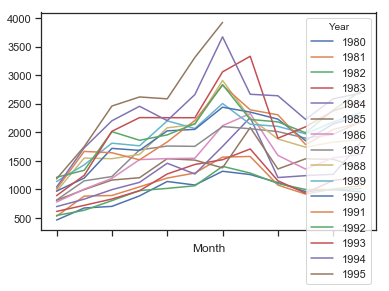

In [29]:
monthly_sales_data.plot()

In [30]:
yearly_sales_data = pd.pivot_table(df_red, values = "Red", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,464.0,675.0,703.0,887.0,1139.0,1077.0,1318.0,1260.0,1120.0,963.0,996.0,960.0
1981,530.0,883.0,894.0,1045.0,1199.0,1287.0,1565.0,1577.0,1076.0,918.0,1008.0,1063.0
1982,544.0,635.0,804.0,980.0,1018.0,1064.0,1404.0,1286.0,1104.0,999.0,996.0,1015.0
1983,615.0,722.0,832.0,977.0,1270.0,1437.0,1520.0,1708.0,1151.0,934.0,1159.0,1209.0
1984,699.0,830.0,996.0,1124.0,1458.0,1270.0,1753.0,2258.0,1208.0,1241.0,1265.0,1828.0
1985,809.0,997.0,1164.0,1205.0,1538.0,1513.0,1378.0,2083.0,1357.0,1536.0,1526.0,1376.0
1986,779.0,1005.0,1193.0,1522.0,1539.0,1546.0,2116.0,2326.0,1596.0,1356.0,1553.0,1613.0
1987,814.0,1150.0,1225.0,1691.0,1759.0,1754.0,2100.0,2062.0,2012.0,1897.0,1964.0,2186.0
1988,966.0,1549.0,1538.0,1612.0,2078.0,2137.0,2907.0,2249.0,1883.0,1739.0,1828.0,1868.0


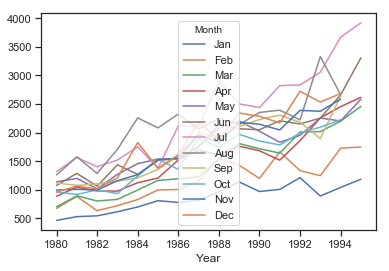

In [31]:
yearly_sales_data.plot()

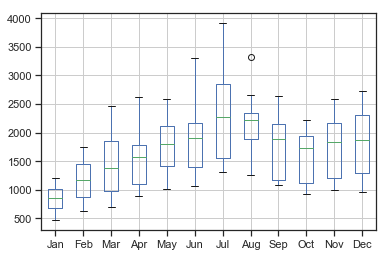

In [32]:
yearly_sales_data.boxplot()

# Answer : 
red wine series is having the behaviour of 'multiplicative' nature

In [33]:
df_sparkling = df[['Month', 'Year', 'Sparkling']]
sparkling_ts = df_sparkling['Sparkling']

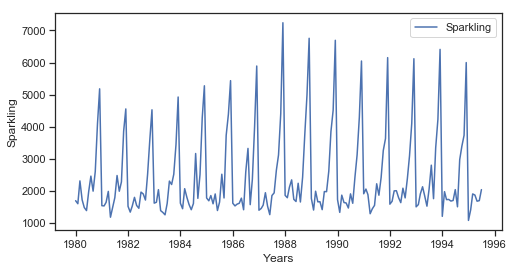

In [34]:
plt.figure(figsize=(8, 4))
plt.plot(sparkling_ts)
plt.xlabel('Years')
plt.ylabel('Sparkling')
plt.legend(loc='best')

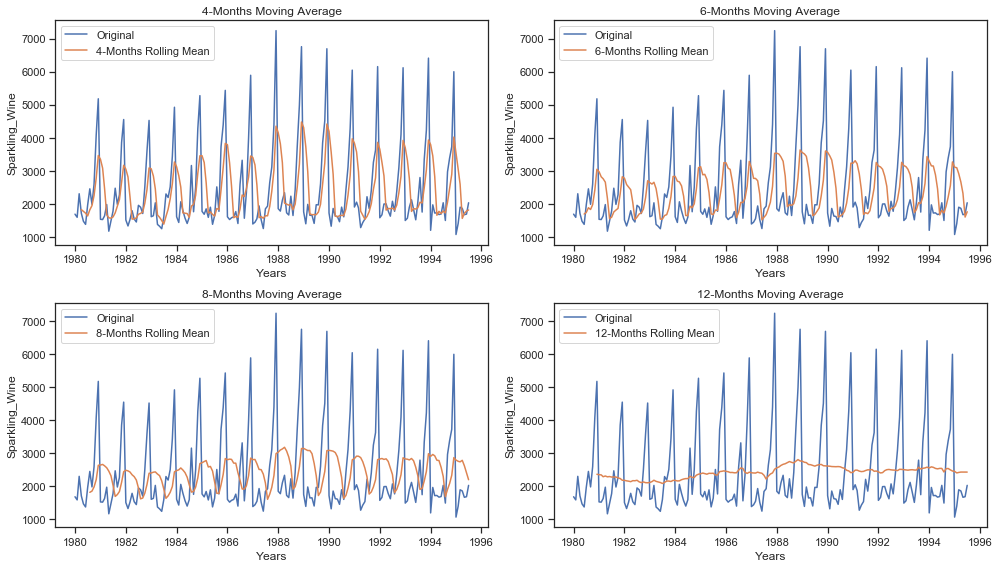

In [35]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sparkling_ts.index, sparkling_ts, label='Original')
axes[0][0].plot(sparkling_ts.index, sparkling_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Sparkling_Wine")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(sparkling_ts.index, sparkling_ts, label='Original')
axes[0][1].plot(sparkling_ts.index, sparkling_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Sparkling_Wine")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(sparkling_ts.index, sparkling_ts, label='Original')
axes[1][0].plot(sparkling_ts.index, sparkling_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Sparkling_Wine")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(sparkling_ts.index, sparkling_ts, label='Original')
axes[1][1].plot(sparkling_ts.index, sparkling_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Sparkling_Wine")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

In [36]:
#Determing rolling statistics
rolmean = sparkling_ts.rolling(window=12).mean()
rolstd = sparkling_ts.rolling(window=12).std()

Text(0.5,1,'Rolling Mean & Standard Deviation')

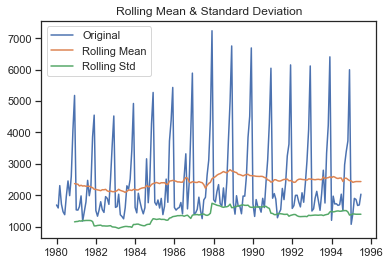

In [37]:
#Plot rolling statistics:
orig = plt.plot(sparkling_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

# Dickey-Fuller Test - Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [38]:
dftest = adfuller(sparkling_ts)
dftest

(-1.3604974548123334,
 0.601060887163487,
 11,
 175,
 {'1%': -3.4682803641749267,
  '5%': -2.8782017240816327,
  '10%': -2.5756525795918366},
 2573.1222090270685)

# Seasonality – Time Series Decomposition

In [39]:
monthly_sales_data = pd.pivot_table(df_sparkling, values = "Sparkling", columns = "Year", index = "Month")
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Apr,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
Aug,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
Dec,5179.0,4551.0,4524.0,4923.0,5274.0,5434.0,5891.0,7242.0,6757.0,6694.0,6047.0,6153.0,6119.0,6410.0,5999.0,NaN
Feb,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
Jan,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
Jul,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
Jun,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
Mar,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
May,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0


In [40]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Jan,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
Feb,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
Mar,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
Apr,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
May,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0
Jun,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
Jul,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
Aug,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
Sep,1984.0,1981.0,1706.0,2191.0,1759.0,1771.0,1562.0,2638.0,2421.0,2608.0,2424.0,2408.0,2377.0,1749.0,2968.0,NaN


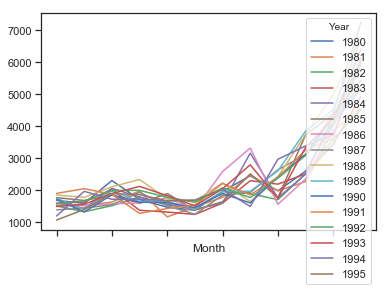

In [41]:
monthly_sales_data.plot()

In [42]:
yearly_sales_data = pd.pivot_table(df_sparkling, values = "Sparkling", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


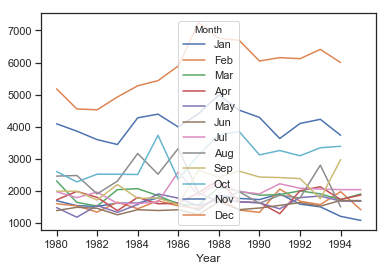

In [43]:
yearly_sales_data.plot()

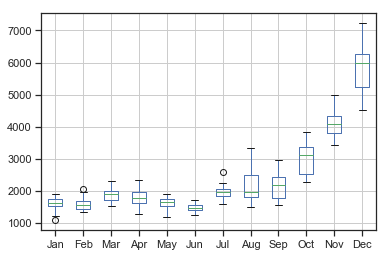

In [44]:
yearly_sales_data.boxplot()

# Answer : 
sparkling series is having the behaviour of 'additive' nature